In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#SKLEARN
from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge, Lasso
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, learning_curve


# Read in the data
data = pd.read_csv('../2_DataCleaning/cleaned_data/clean_merged_data.csv', index_col=0)
print(data.shape)
data.head()

(308923, 22)


,full_name,gsis_id,season_20,season_21,season_x,team_x,position_x_x,status,height,weight,...,years_exp,injury_category,report_primary_injury_x,report_secondary_injury,practice_primary_injury,practice_secondary_injury,report_status_x,practice_status_x,days_since_last_injury,previous_injuries_count
0,a'shawn robinson,00-0032889,NaN,NaN,2022,LA,DT,RES,76.0,330.0,...,6.0,Other,Illness,NaN,Illness,NaN,Questionable,Did Not Participate In Practice,0.0,0
1,a'shawn robinson,00-0032889,NaN,NaN,2022,LA,DT,ACT,76.0,330.0,...,6.0,Other,Illness,NaN,Illness,NaN,Questionable,Did Not Participate In Practice,0.0,1
2,a'shawn robinson,00-0032889,NaN,NaN,2022,LA,DT,RES,76.0,330.0,...,6.0,Other,Illness,NaN,Illness,NaN,Questionable,Did Not Participate In Practice,0.0,2
3,a'shawn robinson,00-0032889,NaN,NaN,2022,LA,DT,RES,76.0,330.0,...,6.0,Other,Illness,NaN,Illness,NaN,Questionable,Did Not Participate In Practice,0.0,3
4,a'shawn robinson,00-0032889,NaN,NaN,2022,LA,DT,RES,76.0,330.0,...,6.0,Other,Illness,NaN,Illness,NaN,Questionable,Did Not Participate In Practice,0.0,4


In [5]:
# Checking for missing values
missing_values = data.isnull().sum()

# Checking data types
data_types = data.dtypes

missing_values, data_types

(full_name                         0
 gsis_id                           0
 season_20                    182799
 season_21                    160785
 season_x                          0
 team_x                            0
 position_x_x                      0
 status                            2
 height                            2
 weight                            2
 birth_date                        2
 age_at_injury                     2
 years_exp                         2
 injury_category                   0
 report_primary_injury_x      154043
 report_secondary_injury      293557
 practice_primary_injury        1555
 practice_secondary_injury    279602
 report_status_x              154043
 practice_status_x                 0
 days_since_last_injury            0
 previous_injuries_count           0
 dtype: int64,
 full_name                     object
 gsis_id                       object
 season_20                    float64
 season_21                    float64
 season_x          

In [7]:
# Creating separate datasets for each season
data_season_20 = data.dropna(subset=['season_20']).drop(columns=['season_21'])
data_season_21 = data.dropna(subset=['season_21']).drop(columns=['season_20'])

# Checking for any remaining missing values in both datasets
missing_values_20 = data_season_20.isnull().sum()
missing_values_21 = data_season_21.isnull().sum()

missing_values_20, missing_values_21, data_season_20.shape, data_season_21.shape



(full_name                         0
 gsis_id                           0
 season_20                         0
 season_x                          0
 team_x                            0
 position_x_x                      0
 status                            0
 height                            0
 weight                            0
 birth_date                        0
 age_at_injury                     0
 years_exp                         0
 injury_category                   0
 report_primary_injury_x       63609
 report_secondary_injury      119586
 practice_primary_injury         772
 practice_secondary_injury    113751
 report_status_x               63609
 practice_status_x                 0
 days_since_last_injury            0
 previous_injuries_count           0
 dtype: int64,
 full_name                         0
 gsis_id                           0
 season_21                         0
 season_x                          0
 team_x                            0
 position_x_x          

In [8]:
# Filling missing values for injury-related columns with 'No Injury'
injury_columns = ['report_primary_injury_x', 'report_secondary_injury', 
                  'practice_primary_injury', 'practice_secondary_injury', 'report_status_x']

for col in injury_columns:
    data_season_20[col].fillna('No Injury', inplace=True)
    data_season_21[col].fillna('No Injury', inplace=True)

# Dropping rows where both practice and report injury data are missing
data_season_20_clean = data_season_20.dropna(subset=['report_primary_injury_x', 'practice_primary_injury'])
data_season_21_clean = data_season_21.dropna(subset=['report_primary_injury_x', 'practice_primary_injury'])

# Checking the shapes of the cleaned datasets
data_season_20_clean_shape = data_season_20_clean.shape
data_season_21_clean_shape = data_season_21_clean.shape

data_season_20_clean_shape, data_season_21_clean_shape


((126124, 21), (148138, 21))

In [9]:
# Checking current data types for both datasets
data_types_season_20 = data_season_20_clean.dtypes
data_types_season_21 = data_season_21_clean.dtypes

data_types_season_20, data_types_season_21


(full_name                     object
 gsis_id                       object
 season_20                    float64
 season_x                       int64
 team_x                        object
 position_x_x                  object
 status                        object
 height                       float64
 weight                       float64
 birth_date                    object
 age_at_injury                float64
 years_exp                    float64
 injury_category               object
 report_primary_injury_x       object
 report_secondary_injury       object
 practice_primary_injury       object
 practice_secondary_injury     object
 report_status_x               object
 practice_status_x             object
 days_since_last_injury       float64
 previous_injuries_count        int64
 dtype: object,
 full_name                     object
 gsis_id                       object
 season_21                    float64
 season_x                       int64
 team_x                        obj

In [10]:
# Converting 'birth_date' to datetime format
data_season_20_clean['birth_date'] = pd.to_datetime(data_season_20_clean['birth_date'], errors='coerce')
data_season_21_clean['birth_date'] = pd.to_datetime(data_season_21_clean['birth_date'], errors='coerce')

# Creating dummy variables for categorical columns in both datasets
categorical_columns = ['team_x', 'position_x_x', 'status', 'injury_category', 
                       'report_primary_injury_x', 'report_secondary_injury', 
                       'practice_primary_injury', 'practice_secondary_injury', 
                       'report_status_x', 'practice_status_x']

data_season_20_dummies = pd.get_dummies(data_season_20_clean, columns=categorical_columns, drop_first=True)
data_season_21_dummies = pd.get_dummies(data_season_21_clean, columns=categorical_columns, drop_first=True)

# Checking the shapes of the new datasets with dummy variables
data_season_20_dummies_shape = data_season_20_dummies.shape
data_season_21_dummies_shape = data_season_21_dummies.shape

data_season_20_dummies_shape, data_season_21_dummies_shape


((126124, 231), (148138, 244))

In [11]:
# Getting the statistical summary for both datasets
statistical_summary_20 = data_season_20_dummies.describe()
statistical_summary_21 = data_season_21_dummies.describe()

statistical_summary_20, statistical_summary_21


(       season_20  season_x         height         weight  \
 count   126124.0  126124.0  126124.000000  126124.000000   
 mean      2020.0    2022.0      74.014391     243.170301   
 min       2020.0    2022.0      66.000000     170.000000   
 25%       2020.0    2022.0      72.000000     202.000000   
 50%       2020.0    2022.0      74.000000     223.000000   
 75%       2020.0    2022.0      76.000000     300.000000   
 max       2020.0    2022.0      80.000000     352.000000   
 std          0.0       0.0       2.768691      49.226446   
 
                           birth_date  age_at_injury      years_exp  \
 count                         126124  126124.000000  126124.000000   
 mean   1994-03-23 18:55:59.436744576      28.381529       5.901946   
 min              1982-01-22 00:00:00      23.000000       0.000000   
 25%              1992-04-21 00:00:00      26.000000       4.000000   
 50%              1994-08-17 00:00:00      28.000000       5.000000   
 75%              1996-

In [12]:
# Function to detect outliers using IQR
def detect_outliers(df, columns):
    outlier_indices = []

    for col in columns:
        Q1 = np.percentile(df[col], 25)
        Q3 = np.percentile(df[col], 75)
        IQR = Q3 - Q1
        outlier_step = 1.5 * IQR

        # Determine a list of indices of outliers for feature col
        outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step)].index
        outlier_indices.extend(outlier_list_col)

    # Select observations containing more than one outlier
    outlier_indices = list(set(outlier_indices))
    return outlier_indices

# Columns to check for outliers
numerical_columns = ['height', 'weight', 'age_at_injury', 'years_exp', 'days_since_last_injury', 'previous_injuries_count']

# Detecting outliers in Season 20 and Season 21 datasets
outliers_20 = detect_outliers(data_season_20_dummies, numerical_columns)
outliers_21 = detect_outliers(data_season_21_dummies, numerical_columns)

len(outliers_20), len(outliers_21)


(11573, 13184)

In [31]:
# Removing outliers from both datasets
data_season_20_no_outliers = data_season_20_dummies.drop(outliers_20)
data_season_21_no_outliers = data_season_21_dummies.drop(outliers_21)

# Standardizing numerical features in both datasets
scaler = StandardScaler()
numerical_features = data_season_20_no_outliers[numerical_columns]
data_season_20_no_outliers[numerical_columns] = scaler.fit_transform(numerical_features)

numerical_features = data_season_21_no_outliers[numerical_columns]
data_season_21_no_outliers[numerical_columns] = scaler.fit_transform(numerical_features)

# Checking the shapes of the datasets after outlier removal and standardization
final_shape_20 = data_season_20_no_outliers.shape
final_shape_21 = data_season_21_no_outliers.shape

final_shape_20, final_shape_21
data_season_20_no_outliers.to_csv('../4_FeatureEngineering/src/feature_no_outliers_20.csv')
data_season_21_no_outliers.to_csv('../4_FeatureEngineering/src/feature_no_outliers_21.csv')

In [23]:
print(data_season_21_no_outliers.columns.tolist())

['full_name', 'gsis_id', 'season_21', 'season_x', 'height', 'weight', 'birth_date', 'age_at_injury', 'years_exp', 'days_since_last_injury', 'previous_injuries_count', 'team_x_ATL', 'team_x_BAL', 'team_x_BUF', 'team_x_CAR', 'team_x_CHI', 'team_x_CIN', 'team_x_CLE', 'team_x_DAL', 'team_x_DEN', 'team_x_DET', 'team_x_GB', 'team_x_HOU', 'team_x_IND', 'team_x_JAX', 'team_x_KC', 'team_x_LA', 'team_x_LAC', 'team_x_LV', 'team_x_MIA', 'team_x_MIN', 'team_x_NE', 'team_x_NO', 'team_x_NYG', 'team_x_NYJ', 'team_x_PHI', 'team_x_PIT', 'team_x_SEA', 'team_x_SF', 'team_x_TB', 'team_x_TEN', 'team_x_WAS', 'position_x_x_CB', 'position_x_x_DE', 'position_x_x_DT', 'position_x_x_FB', 'position_x_x_G', 'position_x_x_K', 'position_x_x_LB', 'position_x_x_LS', 'position_x_x_P', 'position_x_x_QB', 'position_x_x_RB', 'position_x_x_S', 'position_x_x_T', 'position_x_x_TE', 'position_x_x_WR', 'status_CUT', 'status_DEV', 'status_INA', 'status_RES', 'status_TRC', 'injury_category_Other', 'injury_category_Upper Body', 'r

In [26]:

# Excluding non-numerical columns
excluded_columns = ['full_name', 'gsis_id', 'birth_date']  # Add any other non-numerical columns
X = data_season_21_no_outliers.drop(['report_status_x_Out'] + excluded_columns, axis=1)

# Target variable
y = data_season_21_no_outliers['report_status_x_Out']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating the logistic regression model
model = LogisticRegression(max_iter=5000)  # Increasing max_iter for convergence

# Training the model
model.fit(X_train, y_train)

# Making predictions
y_pred = model.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')


Accuracy: 0.9812530102626802


In [27]:
# Training performance
y_train_pred = model.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)

# Test performance
y_test_pred = model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f'Training Accuracy: {train_accuracy}')
print(f'Test Accuracy: {test_accuracy}')


Training Accuracy: 0.9822994914924558
Test Accuracy: 0.9812530102626802


In [29]:
# Cross-validation
cross_val_scores = cross_val_score(model, X, y, cv=5)  # 5-fold cross-validation

print(f'Cross-Validation Accuracy Scores: {cross_val_scores}')
print(f'Average Cross-Validation Accuracy: {np.mean(cross_val_scores)}')

Cross-Validation Accuracy Scores: [0.96839687 0.94509281 0.96454374 0.93505242 0.95676176]
Average Cross-Validation Accuracy: 0.9539695214090891


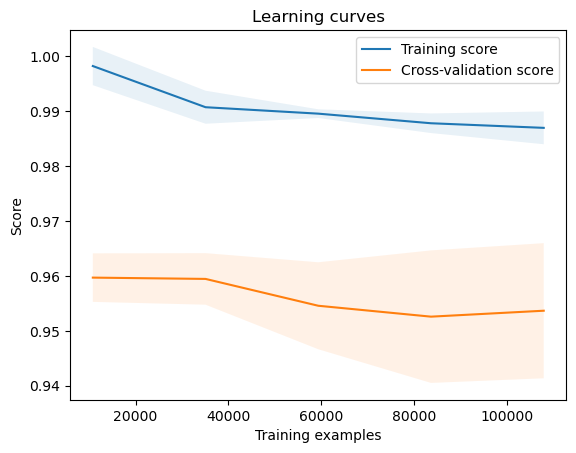

In [30]:
train_sizes, train_scores, test_scores = learning_curve(
    model, X, y, cv=5, n_jobs=-1, 
    train_sizes=np.linspace(.1, 1.0, 5))

# Mean and Standard Deviation of training and test scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plotting the learning curves
plt.plot(train_sizes, train_mean, label='Training score')
plt.plot(train_sizes, test_mean, label='Cross-validation score')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1)
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1)
plt.title('Learning curves')
plt.xlabel('Training examples')
plt.ylabel('Score')
plt.legend()
plt.show()


In [41]:
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)

results_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred,
    'Probability_0': y_proba[:, 0],
    'Probability_1': y_proba[:, 1]
})
# After creating results_df with predictions and probabilities
metrics = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'ROC AUC'],
    'Value': [accuracy, precision, recall, roc_auc]
})

# Combining results with metrics
final_df = pd.concat([results_df, metrics], ignore_index=True)

# Now you can export final_df to CSV
final_df.to_csv('./reports/results.csv', index=False)

